# Center-Surround Preprocessing
To assist in training, we pre-process images to create a common resolution, and apply a CLAHE filter and whiten.

First, we import the support routines.  We also get the variables that set the original data location and the location of the processed data.

In [2]:
from common.image_preprocessing import data_all, data_temp
from common.image_preprocessing import preprocess_images, temp_from_original
from common.image_preprocessing import read_imageio, read_dcm
from common.image_ops import img2grayscale, whiten_img, resize_img, clahe_img, center_surround

image_processing: DATA_ALL=G:\DataAll; DATA_TEMP=E:\Data\zebtrastack_temp


## CXR8 Processing
The CXR8 dataset is a set of PNG radiographs that are named to indicate subject and follow-up

In [7]:
from pathlib import PurePath
sz = 128
temp_relative_path = PurePath(f"{sz}x{sz}") / 'clahe_processed'
cxr8_original_path = data_all / 'chest-nihcc' / 'by_class' / 'no_finding'
cxr8_png_filenames = list(cxr8_original_path.glob('*.png'))[:]
cxr8_temp = temp_from_original(cxr8_original_path, temp_relative_path)

In [ ]:
%matplotlib inline
preprocess_images(cxr8_png_filenames, read_imageio, 
                  lambda img:center_surround(img, sz=sz), cxr8_temp)

## LIDC Processing
LIDC is a collection of CT series, which we process using center-surround as well

In [ ]:
lidc_original_path = data_all / 'TCIA-LIDC' / 'LIDC-IDRI'
lidc_dcm_filenames = list(lidc_original_path.glob('**/*.dcm'))[:]
lidc_temp = temp_from_original(lidc_original_path, temp_relative_path)

In [ ]:
%matplotlib inline
preprocess_images(lidc_dcm_filenames, read_dcm, 
                  lambda img:center_surround(img, sz=sz), lidc_temp)

## eevorg processing

In [12]:
eevorg_original_path = data_temp / 'eevorg' / 'original_png'
eevorg_png_filenames = list(eevorg_original_path.glob('*.png'))[:]
eevorg_temp = data_temp / 'eevorg' / temp_relative_path
print(eevorg_original_path, eevorg_temp)

E:\Data\zebtrastack_temp\eevorg\original_png E:\Data\zebtrastack_temp\eevorg\128x128\clahe_processed


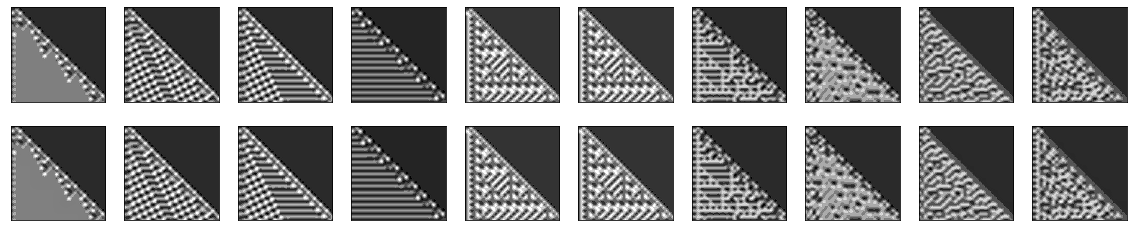

In [13]:
%matplotlib inline
preprocess_images(eevorg_png_filenames, read_imageio, 
                  lambda img:center_surround(img, sz=sz), eevorg_temp)